In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

boston_df['PRICE'] = boston.target
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'Negative MSE scores: {np.round(neg_mse_scores, 2)}')
print(f'RMSE scores: {np.round(rmse_scores, 2)}')
print(f'Average RMSE: {avg_rmse:.3f}')

Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
RMSE scores: [2.81 3.63 4.54 6.8  4.34]
Average RMSE: 4.423


In [2]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print(f'{model.__class__.__name__}\tAverage RMSE: {avg_rmse:.3f}')

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

df_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000, objective ='reg:squarederror')
lgb_reg = LGBMRegressor(n_estimators=1000)

In [4]:
models = [df_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    get_model_cv_prediction(model, X_data, y_target)

DecisionTreeRegressor	Average RMSE: 5.978
RandomForestRegressor	Average RMSE: 4.423
GradientBoostingRegressor	Average RMSE: 4.269
XGBRegressor	Average RMSE: 4.089
LGBMRegressor	Average RMSE: 4.646


<AxesSubplot:>

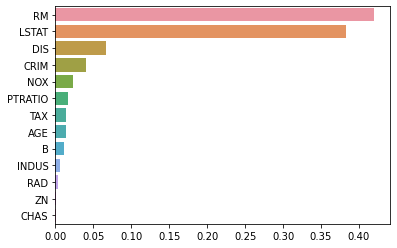

In [5]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


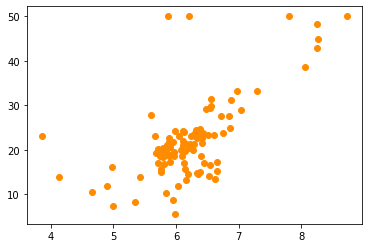

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

boston_df_sample = boston_df[['RM', 'PRICE']]
boston_df_sample = boston_df_sample.sample(n=100, random_state=0)
print(boston_df_sample.shape)
plt.figure()
plt.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = boston_df_sample['RM'].values.reshape(-1, 1)
y_target = boston_df_sample['PRICE'].values.reshape(-1, 1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

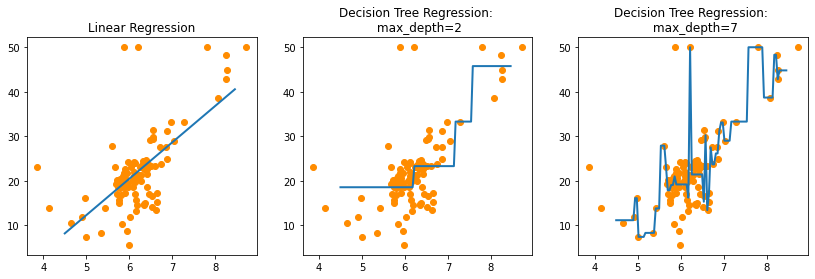

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)